<a href="https://colab.research.google.com/github/Raghuram-Veeramallu/Astro_Stat_Project2/blob/development/Group3_Project2_DataSummary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AST/STAT 5731 Project 2
### Research Synopsis
**Group 3**   
Daniel Warshofsky  
Hari Veeramallu  
Jacynda Alatoma  
Nicholas Kruegler

### Research Question

What is the value of Hubble's constant as found from a linear regression of the redshifts and distances of Type Ia supernovae within a redshift of 0.1?

### Preamble  


Hubble's law is a relationship that describes the expansion of the universe by connecting the speed at which galaxies move away from each other with the distance between the two objects. For small distances, Hubble's law is a linear relationship between the velocity of the object and the distance:

$v=H_0 d$ or $z=\frac{H_0}{c}d$

where $z$ is the redshift, $v=cz$ is the velocity of the object, $H_0$ is Hubble's constant. The faster a body moves away from the observer, the more redshifted the light emitted from that body is. Thus, further bodies will move away faster and have a higher redshift. The linear scaling of this redshift increase is determined by Hubble's constant.

Type Ia supernovae provide one possible route for investigating Hubble's law. These objects are standardizable candles, meaning that their distance to the observer can be determined with few parameters. From the data set used for this project, the distance will be determined from their peak magnitude, color and shape of the light curve. The redshift for these supernovae is also provided, allowing for the the determination of Hubble's constant through a linear regression.

The data set being used is limited to Type Ia supernovae up to about a redshift of 1. The data provides the redshift relative to the universe rest frame (the CMB rest frame) and the peak magnitude of the supernova. To avoid having to account for cosmological effects in the relationship between redshift and distance, only supernovae within a redshift of 0.1 will be used. As provided in the reference paper, the distance can be calculated for these supernovae from a consideration of the peak magnitude, a time-stretching parameters and the color of the supernova.

A complicating factor for this data set is in the residuals from a linear fit. The errors for the measurements of the peak magnitude increases for larger magnitudes, which means that the intrinsic spread doesn't follow a simple normal distribution. One possible correction method for this is a Box-Cox Transformation, but other alternate routes for ensuring an accurate regression are being investigated, since Box-Cox transformations disrupt the ability to derive Hubble's constant from the analysis.


### Data   

Referenced Literature [Improved cosmological constraints from a joint analysis
of the SDSS-II and SNLS supernova samples](https://www.aanda.org/articles/aa/pdf/2014/08/aa23413-14.pdf)

Data sourced from [VizieR](https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/A%2bA/568/A22/tablef3)

Raw data is available at [Google Drive](https://drive.google.com/file/d/1v6LSAKvkuEjahtOWDNq3riBMLkD7rZD0/view).  
Processed data is available at [Google Drive](https://drive.google.com/file/d/1tNsa4dsuUuPDwI-Hin4MMx0rOuYFSbLC/view).

##### 1. Loading the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# download the dataset to colab / local environment

## for google colab
!gdown 1v6LSAKvkuEjahtOWDNq3riBMLkD7rZD0

## for local environment
# !gdown https://drive.google.com/uc?id=1v6LSAKvkuEjahtOWDNq3riBMLkD7rZD0

Downloading...
From: https://drive.google.com/uc?id=1v6LSAKvkuEjahtOWDNq3riBMLkD7rZD0
To: /content/snaeT1.tsv
100% 47.4k/47.4k [00:00<00:00, 63.4MB/s]


In [ ]:
## Load the data

# NOTE: change the data path to the download path mentioned in the cell above
# This is typically your downloads folder
data = pd.read_csv('/content/snaeT1.tsv', sep='\t')

##### 2. Looking at the data

In [ ]:
data.head(5)

,zcmb,zhel,mb,e_mb,x1,e_x1,c,e_c,logMst
0,0.503,0.5043,23.002,0.088,1.273,0.150,-0.012,0.030,9.517
1,0.581,0.5820,23.574,0.090,0.974,0.274,-0.025,0.037,9.169
2,0.495,0.4960,22.960,0.088,-0.729,0.102,-0.100,0.030,11.580
3,0.346,0.3470,22.398,0.087,-1.155,0.113,-0.041,0.027,10.821
4,0.678,0.6790,24.078,0.098,0.619,0.404,-0.039,0.067,8.647


**Column Description:**.

| Column  | Description                 |
| ------- | --------------------------- |
| zcmb    | CMB Frame Redshift          |
| zhel    | Heliocentric Redshift       |
| mb      | B band peak magnitude (in mB)|
| e_mb    | Error in mb                 |
| x1      | SALT2 shape (stretch) parameter |
| e_x1    | Error in x1                 |
| c       | SALT2 color parameter       |
| e_c     | Error in c                  |
| logMst  | $Log_{10}$ Host Stellar Mass|

In [ ]:
data.describe()

,zcmb,zhel,mb,e_mb,x1,e_x1,c,e_c,logMst
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.323870,0.324449,20.904961,0.115899,0.036589,0.311096,-0.023878,0.038897,9.795342
std,0.276893,0.276748,2.655139,0.018767,0.988554,0.211399,0.084118,0.015694,1.395068
min,0.010000,0.009400,14.148000,0.085000,-2.863000,0.018000,-0.250000,0.012000,5.000000
25%,0.124000,0.124425,19.735500,0.102000,-0.650250,0.148500,-0.084250,0.026000,9.316750
50%,0.229000,0.230500,21.099000,0.114000,0.165500,0.268000,-0.030500,0.035000,10.193500
75%,0.498000,0.499000,23.043000,0.124000,0.775750,0.420000,0.031000,0.050000,10.710250
max,1.299000,1.300000,26.047000,0.175000,2.337000,1.641000,0.260000,0.107000,11.817000


##### 3. Converting the shape and color paramters to distance

Since we want to estimate the relationship between the Distance and the Redshift (CMB), we need to compute the distance from the parameters that we have available to us.

Distance can be computed through Distance Modulii $\mu$, defined as
$$ \mu = m_{B}^{*} - (M_{B} - \alpha X_{1} + \beta C)$$


where,  
$m_{B}^{*}$ is the observed peak magnitude in rest frame B band.  
$M_{B}$ is the absolute magnitude of the supernova (adjusted based on host galaxy's properties). It depends on the host galalxy's stellar mass ($M_{stellar}$).   
$$M_{B} = \begin{cases} M_{B}^{1} & \text{if $M_{stellar} < 10^{10} M_{\odot}$} \\
M_{B}^{1} + \Delta_{m} & \text{otherwise}
\end{cases}$$   
here, $M_{\odot}$ is the mass of the Sun.   
$\alpha, \beta$ are the nuisance parameters that account for the shape of the light curve ($X_{1}$) and the color of the supernova ($C$) respectively.  
$\beta, M_{B}$ are found to be dependent on the host galaxy properties.  


Modulus can be converted into distance (in parsec) using $ d_{L} = 10^{\mu/5 + 1} $.  
($\mu = 5 log_{10}{(d_{L} /10 \,\mathrm{pc})}$ according to the literature[[1](https://www.aanda.org/articles/aa/pdf/2014/08/aa23413-14.pdf)]).

Since there are errors associated with each measurement, we need to estimate the distance errors as well.   

Error parameter $\sigma_{\mu}$ = $\sqrt{\sigma_{m_{b}}^{2} + (\alpha \sigma_{X_{1}})^2 + (\beta \sigma_{C})^2}$.  
where $\sigma_{m_{b}}, \sigma_{X_{1}}, \sigma_{C}$ refer to the error terms of $m_{b}, X_{1}$ and $C$ (`e_mb`, `e_x1` and `e_c` from the dataset).  

Error in distance measurements
$$\sigma_{d} = \frac{\sigma_{\mu} . log(10) . |d|}{5}$$

From the literature the values used are, $\alpha = 0.141, \beta = 3.101, M_{B}^{1} = -19.05$ and $\Delta_{M} = -0.07$ (according to the C11 analysis)

The absolute magnitude of type Ia in B-band is consistent, typically around $-19.3 \pm 0.3 $ in magnitude.

In [41]:
# defining the nuiscance parameters
alpha = 0.141
beta = 3.101
MB1 = -19.05
DeltaM = -0.07

In [42]:
# MB
data['MB'] = MB1 + (DeltaM * (data['logMst'] > 10))

# mu
data['dist_moduli'] = data['mb'] - (data['MB'] - alpha * data['x1'] + beta * data['c'])

# distance
data['d'] = 10 ** (data['dist_moduli']/5 + 1) * 10**(-6) #converting to Mpc

In [43]:
# distance modulii (mu) error
data['e_mu'] = np.sqrt(data['e_mb'] ** 2 + (alpha * data['e_x1']) ** 2 + (beta * data['e_c']))

# distance error
data['e_d']= (data['e_mu'] * np.log(10) * np.abs(data['d']))/5

In [44]:
data.head(5)

,zcmb,zhel,mb,e_mb,x1,e_x1,c,e_c,logMst,MB,dist_moduli,d,e_mu,e_d
0,0.503,0.5043,23.002,0.088,1.273,0.150,-0.012,0.030,9.517,-19.05,42.268705,2842.765263,0.318153,416.507368
1,0.581,0.5820,23.574,0.090,0.974,0.274,-0.025,0.037,9.169,-19.05,42.838859,3696.339046,0.352604,600.212075
2,0.495,0.4960,22.960,0.088,-0.729,0.102,-0.100,0.030,11.580,-19.12,42.287311,2867.227808,0.317775,419.592173
3,0.346,0.3470,22.398,0.087,-1.155,0.113,-0.041,0.027,10.821,-19.12,41.482286,1979.051975,0.302572,275.760290
4,0.678,0.6790,24.078,0.098,0.619,0.404,-0.039,0.067,8.647,-19.05,43.336218,4647.758994,0.469698,1005.327787


From literature it is identified that zhel and zcmb are the redshifts from two different reference points. zhel is measured relative to the sun and zcmb is measured relative to the frame of CMB. The Heliocentric redshift accounts for motion of the Earth and the solar system with respect to the observed object while the CMB redshift accounts for the motion of solar system relative to the universal rest frame.

Although these two values are almost same for nearby objects, CMB redshift is often used as an universal standard in cosmology.

In [45]:
# selecting only the required parameters from here
df = data[['zcmb', 'd', 'e_d']]
df.describe()

,zcmb,d,e_d
count,740.000000,740.000000,740.000000
mean,0.323870,1881.245586,351.420329
std,0.276893,1872.763199,397.231462
min,0.010000,41.203566,6.331576
25%,0.124000,592.337322,84.478475
50%,0.229000,1150.148111,195.752381
75%,0.498000,2828.445085,456.350724
max,1.299000,9490.108987,2500.113156


We are considering values with $Z_{cmb} \lt 0.1$ since that's below the threshold at which cosmology matters.

In [46]:
corr_df = df[df['zcmb'] < 0.1]
corr_df.describe()

,zcmb,d,e_d
count,152.000000,152.000000,152.000000
mean,0.038625,173.772068,25.647392
std,0.023841,112.813504,17.132628
min,0.010000,41.203566,6.331576
25%,0.020750,89.396983,12.902647
50%,0.030000,137.566100,20.176316
75%,0.055000,243.322508,36.296735
max,0.096000,479.124523,69.284701


##### 4. Visualizing the Data

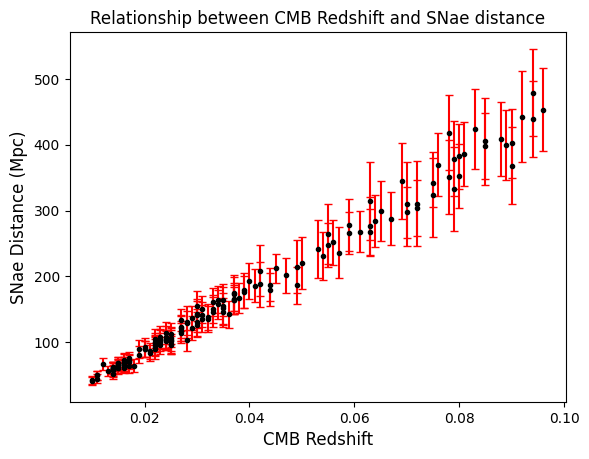

In [47]:
plt.errorbar(corr_df['zcmb'], corr_df['d'],yerr=corr_df['e_d'],fmt="k.",ecolor="r",capsize=3)
plt.xlabel('CMB Redshift', size=12)
plt.ylabel('SNae Distance (Mpc)', size=12)
plt.title('Relationship between CMB Redshift and SNae distance', size=12)
plt.show()

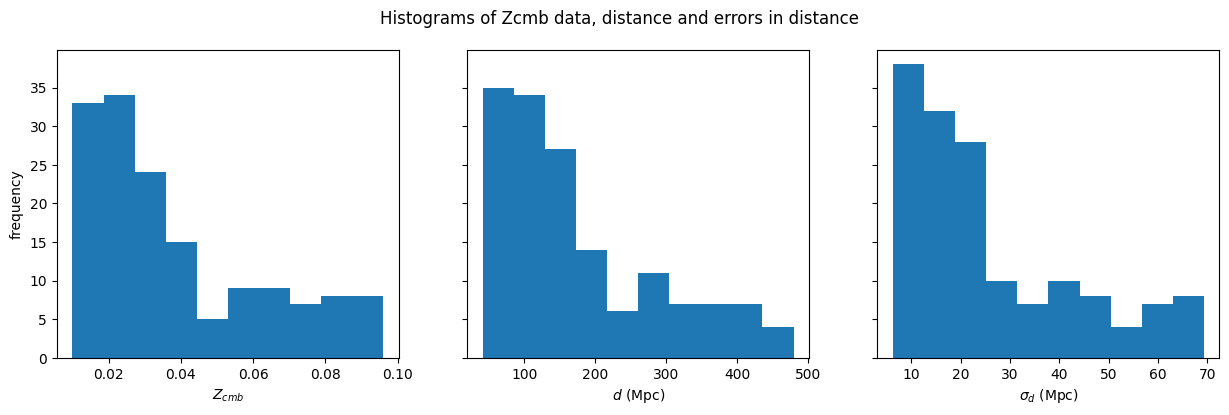

In [50]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize=(15, 4))
ax[0].hist(corr_df['zcmb'])
ax[0].set_xlabel(r'$Z_{cmb}$')
ax[0].set_ylabel('frequency')
ax[1].hist(corr_df['d'])
ax[1].set_xlabel(r'$d$ (Mpc)')
ax[2].hist(corr_df['e_d'])
ax[2].set_xlabel(r'$\sigma_{d}$ (Mpc)')
fig.suptitle('Histograms of Zcmb data, distance and errors in distance')
fig.show()

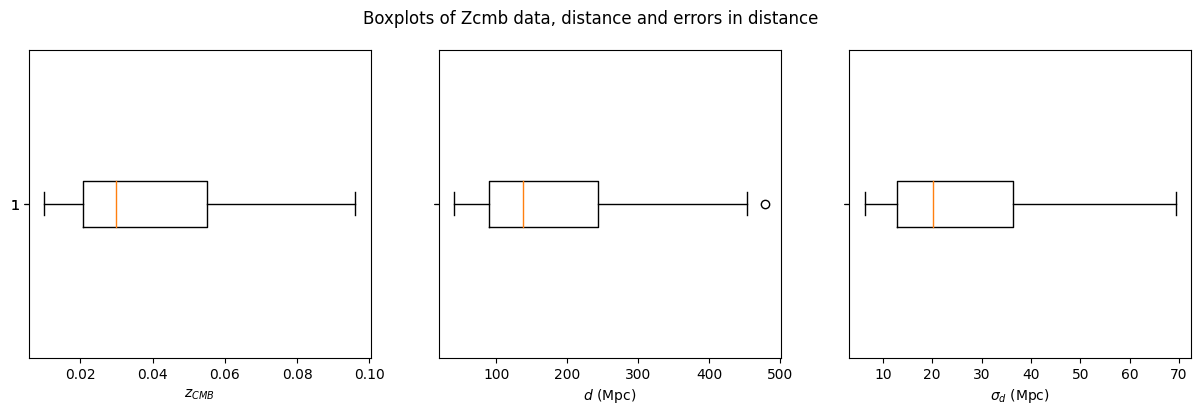

In [54]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
ax[0].boxplot(corr_df['zcmb'], vert=False)
ax[0].set_xlabel(r'$z_{CMB}$')
ax[1].boxplot(corr_df['d'], vert=False)
ax[1].set_xlabel(r'$d$ (Mpc)')
ax[2].boxplot(corr_df['e_d'], vert=False)
ax[2].set_xlabel(r'$\sigma_{d}$ (Mpc)')
fig.suptitle('Boxplots of Zcmb data, distance and errors in distance')
fig.show()

##### 5. **Statistical Model**  

1. $x$, the redshift of the SNae
2. $X=(0,0.1]$, the set of all redshift values less than 0.1
3. Observed distance (in Mpc), $y=[41.2,479.1]$ (data described above)
4. Sample space, $Y = \mathbb{R}_+^{n}$  
5. The likelihood for our normal regression is $$Y|X,\beta,\tau \sim N(x_i\beta,\tau^{-1})$$
where $x_i\beta$ is the linear regression model $x_i\beta = \beta_0+\beta_1x_i$.
6. The priors for our model parameters are defined as $$X\sim N(0,1000)$$ $$\beta \sim N(0,1000)$$  $$\tau \sim \mathrm{Gamma}(0.5,0.5)$$
which involve standard choices for the hyperparameters of the normal and gamma distributions.